# **Predictive Maintenance for Industrial Equipment**

## **Introduction**

Predictive maintenance has become a critical focus in modern industrial operations, aiming to prevent unexpected machinery failures and optimize operational efficiency. By leveraging data science techniques, we can analyze patterns and anomalies in machine performance data to forecast potential breakdowns before they occur. This project explores the application of machine learning algorithms to predict equipment failures, demonstrating how data-driven insights can enhance maintenance strategies, reduce downtime, and save costs. The study highlights the transformative impact of predictive maintenance in extending machinery life and ensuring uninterrupted industrial productivity.

## **Objective**

The primary objective of this project is to develop a machine learning algorithm capable of accurately predicting machinery failures. This approach not only enhances the efficiency and reliability of maintenance operations but also minimizes downtime and operational costs, thereby driving significant improvements in industrial productivity and asset management.

## **Importing libraries and dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

# Oversampler
from imblearn.over_sampling import RandomOverSampler

# ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Model validation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score

# Cross validation + Kfold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, recall_score

In [ ]:
# URL of the CSV file on GitHub
url = 'https://raw.githubusercontent.com/mariofreites/portfolio/main/Machine-Predictive-Maintenance-Classification/ai4i2020.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

In [ ]:
# We set the data from the 'UDI' column as the indices of the dataframe.
df.set_index('UDI', inplace=True)
df.head()

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,,,,,,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
df.shape

(10000, 13)

## **Dataset Description**

The AI4I 2020 Predictive Maintenance Dataset simulates real-world predictive maintenance scenarios often seen in industry, where such datasets are typically hard to come by. Inspired by a real milling machine, it comprises 10,000 data points, each represented by a row with 14 unique features in columns.

1. UDI: Unique identifier for each event/row

1. Product ID: Alphanumeric identifier for each product

1. Type: The type of product created by the machine: "L/M/H" (low/medium/high quality, respectively)

1. Air temperature [K]: Air temperature in Kelvin

1. Process temperature [K]: Internal temperature of the machine

1. Rotational speed [rpm]: Rotational speed of the machine in revolutions per minute

1. Torque [Nm]: Torque force of the machine in Newton-meters

1. Tool wear [min]: Wear of the tool used by the machine, in minutes

1. Machine failure: Indicates whether there has been a machine failure (boolean)

1. TWF: ("Tool Wear Failure") Indicates a failure due to tool wear (boolean)

1. HDF: ("Heat Dissipation Failure") Indicates a failure due to improper heat dissipation (boolean)

1. PWF: ("Power Failure") Indicates a failure due to insufficient or excessive power supplied to the machine (boolean)

1. OSF: ("Overstrain Failure") Indicates a machine failure due to overstrain (boolean)

1. RNF: ("Random Failure") Indicates a random machine failure not related to any of the above parameters (boolean)

This dataset is part of the following publication:

S. Matzka, "Explainable Artificial Intelligence for Predictive Maintenance Applications," 2020 Third International Conference on Artificial Intelligence for Industries (AI4I), 2020, pp. 69-74, doi: 10.1109/AI4I49448.2020.00023.

## **Data Preparation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product ID               10000 non-null  object 
 1   Type                     10000 non-null  object 
 2   Air temperature [K]      10000 non-null  float64
 3   Process temperature [K]  10000 non-null  float64
 4   Rotational speed [rpm]   10000 non-null  int64  
 5   Torque [Nm]              10000 non-null  float64
 6   Tool wear [min]          10000 non-null  int64  
 7   Machine failure          10000 non-null  int64  
 8   TWF                      10000 non-null  int64  
 9   HDF                      10000 non-null  int64  
 10  PWF                      10000 non-null  int64  
 11  OSF                      10000 non-null  int64  
 12  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 1.1+ MB


* No Missing Values.
* The dataset includes a mix of data types (object, float, int).
* Product ID and Type are categorical variables.
* The dataframe's memory usage is 1.1+ MB, which is manageable for analysis.

In [ ]:
df.describe(include='all')

,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [ ]:
# Counting possible hidden null values in each column
df.replace("?",np.nan,inplace=True)
print('Total nulls per column:')
print(df.isnull().sum())

Total nulls per column:
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


There are no null values in the dataset.



## **Data Exploration (EDA)**

#### **Boxplots and Outliers**

We will look for outliers using boxplot graphs.

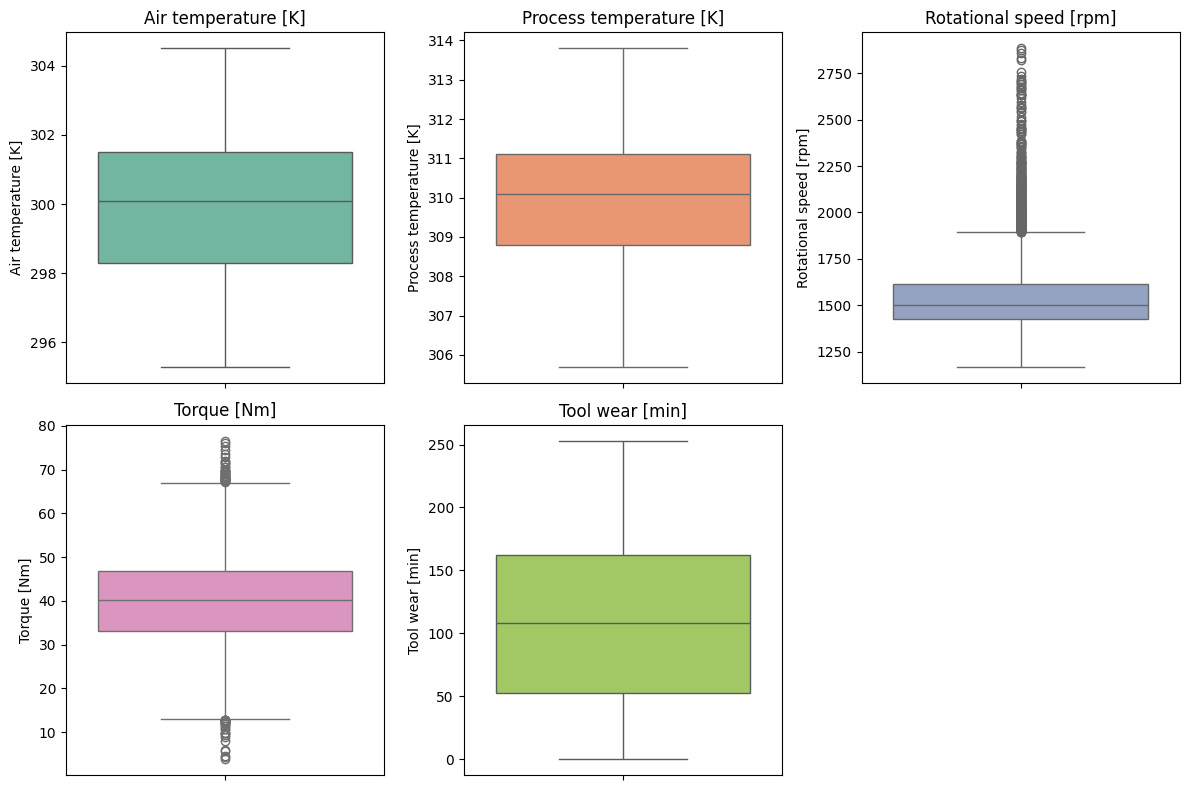

In [ ]:
# Variables to analyze
variables = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Create boxplots with different colors
plt.figure(figsize=(12, 8))
colors = sns.color_palette("Set2")  # Define a color palette

for i, var in enumerate(variables, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[var], color=colors[i-1])  # Use a different color for each boxplot
    plt.title(var)

plt.tight_layout()
plt.show()

Outliers were identified in two variables:

* Rotational speed [rpm], with values predominantly above the mean.
* Torque [Nm], where outliers are evenly distributed around the mean.

Since these values are plausible and may be closely related to machine failure, we have decided to retain them.

#### **Heatmap**

Next, we analyze the linear relationships between variables using a correlation matrix, also referred to as a heatmap. This tool, which is fundamental in bivariate analysis, visually represents the strength and direction of correlations, aiding in the identification of patterns and dependencies within the data.

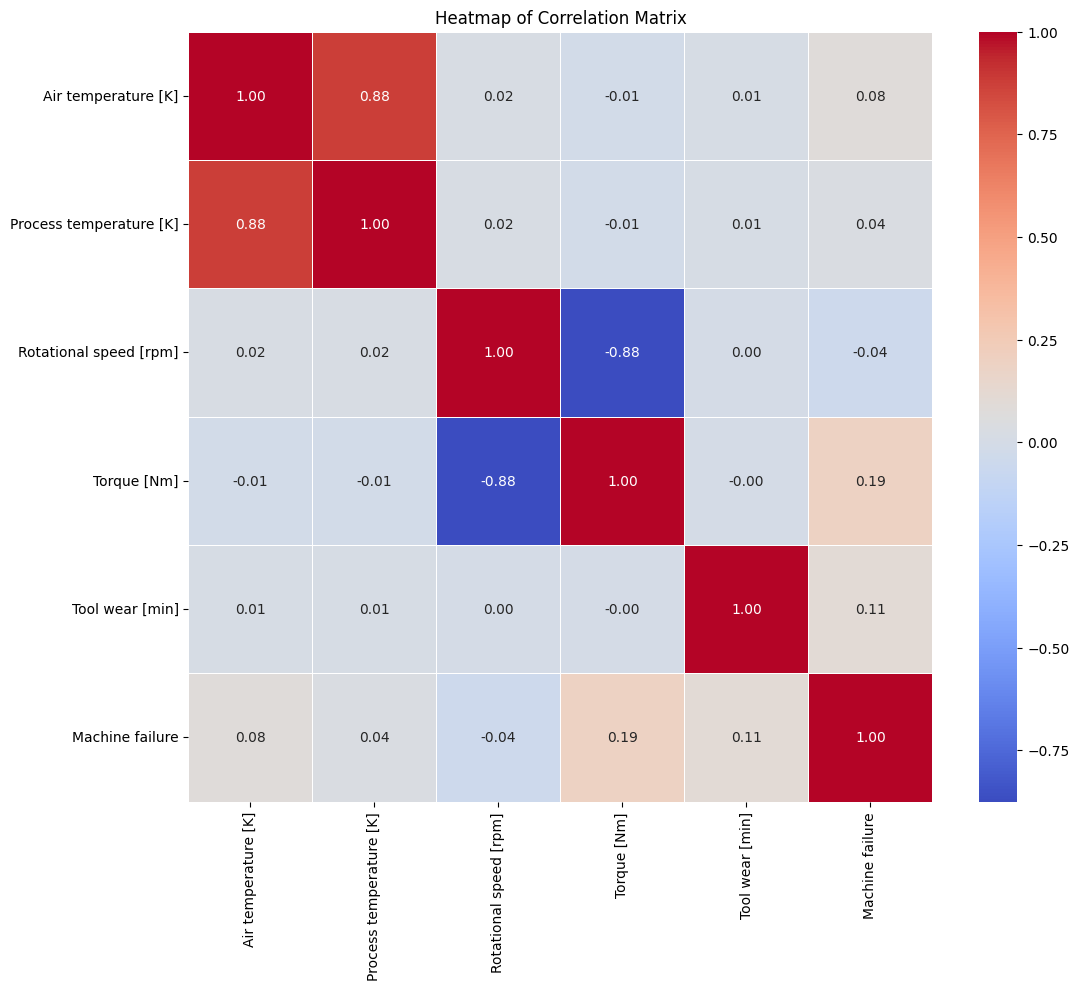

In [ ]:
# Calculate the correlation matrix
numeric_variables = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']]
corr_matrix = numeric_variables.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

Observations:

* High Correlation between Air Temperature [K] and Process Temperature [K]: These two variables are highly correlated (0.88)
* Strong Negative Correlation between Rotational Speed [rpm] and Torque [Nm]: There is a strong negative correlation (-0.88) between rotational speed and torque. This is a common mechanical relationship where higher speeds often require less torque.

#### **Histograms**

To explore the distribution of each numerical variable, we created histograms for all numerical columns. Histograms are essential for visualizing data distribution, identifying outliers, and checking data quality.

This step helps in understanding the underlying patterns and preparing the data for further analysis.

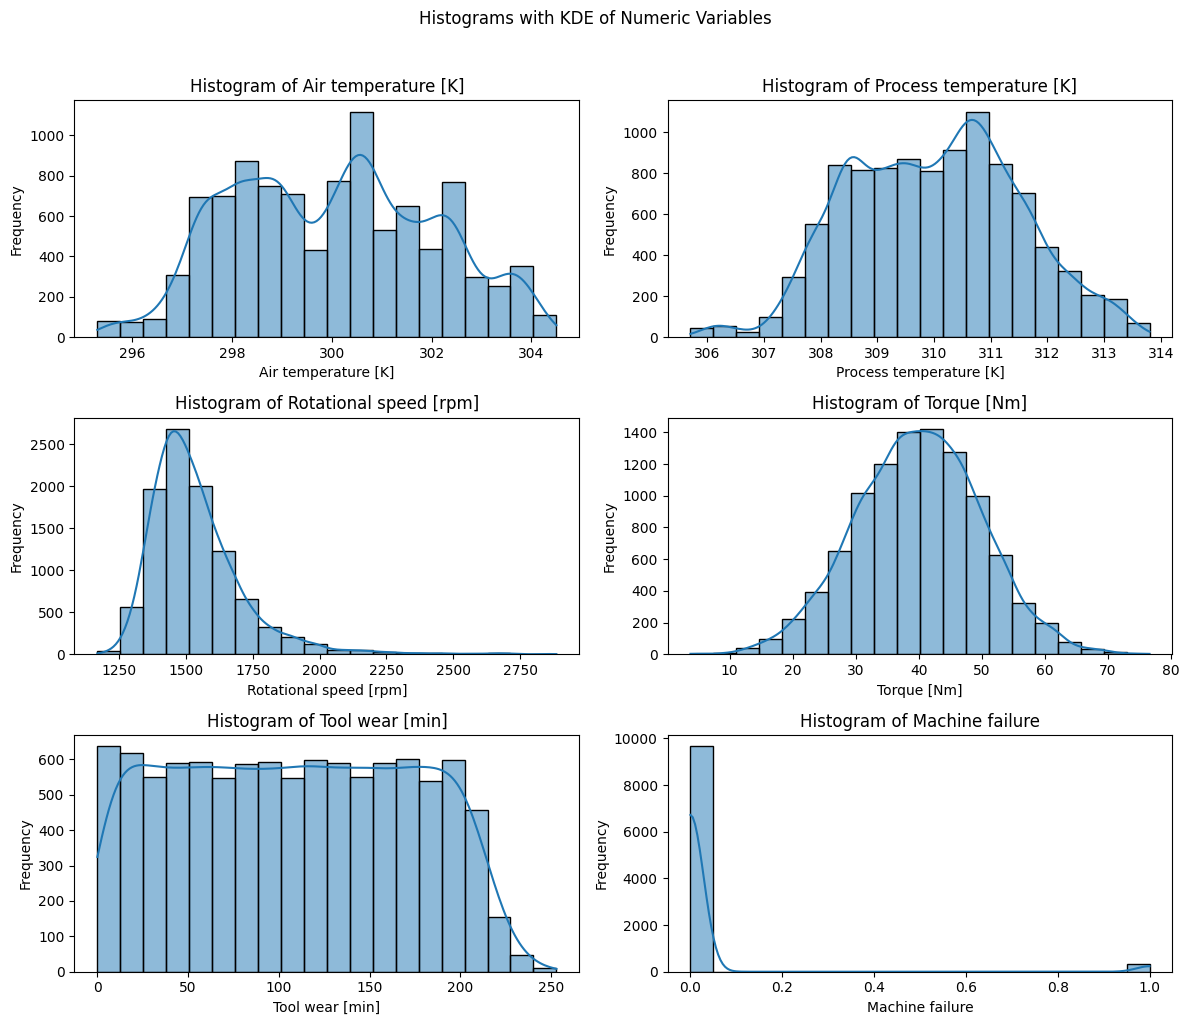

In [ ]:
# Determine the number of numerical columns
num_columns = len(numeric_variables.columns)

# Create subplots with a 2-column layout
fig, axes = plt.subplots(nrows=(num_columns + 1) // 2, ncols=2, figsize=(12, 10))
fig.suptitle('Histograms with KDE of Numeric Variables', y=1.02)

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate through each numerical column and create a histogram with KDE
for i, column in enumerate(numeric_variables.columns):
    sns.histplot(data=numeric_variables[column], bins=20, kde=True, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


By observing the histograms of the numerical variables of the dataset, the following conclusions can be drawn:

1. Process temperature [K]:
  * The process temperature shows a nearly normal distribution, centered around 310 K.
  * This suggests that the machine operates at a constant internal temperature, with few fluctuations.

1. Rotational speed [rpm]:
  * The rotation speed has a right-skewed distribution, with a large concentration of values ​​around 1500 rpm.
  * There are extreme values ​​that indicate significantly higher speeds, although these are less frequent.

1. Torque [Nm]:
  * The torque shows a symmetrical distribution with a clear peak around 40 Nm.
  * The shape of the distribution suggests a consistent behavior of the torque applied by the machine.

1. Tool wear [min]:
  * Tool wear appears to be uniformly distributed, suggesting constant variability in tool wear time.
  * There is no clear pattern, which could indicate that tools are replaced or maintained on a regular and consistent basis.

1. Machine failure:
  * The machine failure variable is highly unbalanced, with an overwhelming majority of values ​​of 0 (no failure) and very few values ​​of 1 (with failure).

## **Feature Importance Analysis**

In this section, we will:

1. **Prepare the Data:** Split the dataset into features (X) and the target variable (y), and apply one-hot encoding to the categorical column Type.

1. **Train a Random Forest Classifier:** Fit a RandomForestClassifier with the prepared data.

1. **Evaluate Feature Importances:** Extract and display the feature importances to understand which features contribute most to predicting machine failure.

In [ ]:
# Drop indices
df.drop(['Product ID'],axis=1,inplace=True)

# Drop failure types (we want to predict failures regardless of the type)
df.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)

# Drop machine type
df.drop(['Type'],axis=1,inplace=True)

In [ ]:
# Define X and y
X = df.drop(columns=['Machine failure'])
y = df['Machine failure']

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for easy viewing
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                   Feature  Importance
3              Torque [Nm]    0.328575
2   Rotational speed [rpm]    0.219756
4          Tool wear [min]    0.160414
0      Air temperature [K]    0.149249
1  Process temperature [K]    0.142007


Observations:

* **Torque [Nm] (0.320)** is the most influential feature, suggesting it's highly predictive of machine failure.

* **Rotational speed [rpm] (0.227)** is also significant, showing a strong link between rotational speed and failure risk.

* **Tool wear [min] (0.164)** this value indicates that wear and tear is a key factor in predicting breakdowns.

* **Air temperature [K] (0.139) and Process temperature [K] (0.142)** have important predictive power.

We will keep all five variables.

## **Model selection**

### **Oversampling**

To address the class imbalance and improve recall for the minority class, we apply the Random Oversampling. This technique generates synthetic samples for the minority class, helping the model better learn its patterns.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

### **Logistic Regression**

In [ ]:
logreg = LogisticRegression(max_iter=1000)  # Increased number of iterations
logreg.fit(X_resampled, y_resampled)
y_pred_logreg = logreg.predict(X_test)

In [ ]:
logreg_Recall = recall_score(y_test, y_pred_logreg)
logreg_Precision = precision_score(y_test, y_pred_logreg)
logreg_f1 = f1_score(y_test, y_pred_logreg)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

print('Logistic Regression metrics')
print('--------------------------------------')
print(f'Accuracy: {logreg_accuracy}')
print(f'Recall: {logreg_Recall}')
print(f'Precision: {logreg_Precision}')
print(f'F1 Score: {logreg_f1}')
print('--------------------------------------')
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression metrics
--------------------------------------
Accuracy: 0.825
Recall: 0.8524590163934426
Precision: 0.13231552162849872
F1 Score: 0.2290748898678414
--------------------------------------
Logistic Regression Confusion Matrix:
 [[1598  341]
 [   9   52]]


### **Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap=True)
rf.fit(X_resampled, y_resampled)
y_pred_rf = rf.predict(X_test)

In [ ]:
rf_Recall = recall_score(y_test, y_pred_rf)
rf_Precision = precision_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print('Random Forest metrics')
print('--------------------------------------')
print(f'Accuracy: {rf_accuracy}')
print(f'Recall: {rf_Recall}')
print(f'Precision: {rf_Precision}')
print(f'F1 Score: {rf_f1}')
print('--------------------------------------')
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest metrics
--------------------------------------
Accuracy: 0.9845
Recall: 0.639344262295082
Precision: 0.8125
F1 Score: 0.7155963302752295
--------------------------------------
Random Forest Confusion Matrix:
 [[1930    9]
 [  22   39]]


### **KNN Classifier**

In [ ]:
# Train the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn.fit(X_resampled, y_resampled)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Calculate evaluation metrics
knn_Recall = recall_score(y_test, y_pred_knn)
knn_Precision = precision_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Print the results
print('KNN metrics')
print('--------------------------------------')
print(f'Accuracy: {knn_accuracy}')
print(f'Recall: {knn_Recall}')
print(f'Precision: {knn_Precision}')
print(f'F1 Score: {knn_f1}')
print('--------------------------------------')
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN metrics
--------------------------------------
Accuracy: 0.93
Recall: 0.39344262295081966
Precision: 0.1889763779527559
F1 Score: 0.2553191489361702
--------------------------------------
KNN Confusion Matrix:
 [[1836  103]
 [  37   24]]


### **Gradient Boosting**

In [ ]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_resampled, y_resampled)
y_pred_gb = gb.predict(X_test)

# Evaluate Gradient Boosting
print('Gradient Boosting metrics')
print('--------------------------------------')
print(f'Accuracy: {accuracy_score(y_test, y_pred_gb)}')
print(f'Recall: {recall_score(y_test, y_pred_gb)}')
print(f'Precision: {precision_score(y_test, y_pred_gb)}')
print(f'F1 Score: {f1_score(y_test, y_pred_gb)}')
print('--------------------------------------')
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting metrics
--------------------------------------
Accuracy: 0.941
Recall: 0.8688524590163934
Precision: 0.32515337423312884
F1 Score: 0.4732142857142857
--------------------------------------
Gradient Boosting Confusion Matrix:
 [[1829  110]
 [   8   53]]


## **K-Fold Cross-Validation**

K-Fold cross-validation evaluates model performance by splitting the data into K folds. The model is trained and tested on different folds, providing a robust estimate of performance and reducing the risk of overfitting.

Recall was used in cross-validation to minimize false negatives, as missing positive cases can be costly. This metric ensures the model is effective at identifying all potential positive cases.








In [ ]:
recall_scorer = make_scorer(recall_score)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
models = [
    ('Logistic Regression', logreg),
    ('Random Forest', rf),
    ('KNN', knn),
    ('Gradient Boosting', gb)
]

In [ ]:
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kf, scoring=recall_scorer, n_jobs=-1)
    print(f'{name} Recall: {cv_results.mean():.4f} (+/- {cv_results.std():.4f})')

Logistic Regression Recall: 0.2028 (+/- 0.0721)
Random Forest Recall: 0.6078 (+/- 0.0723)
KNN Recall: 0.2028 (+/- 0.0506)
Gradient Boosting Recall: 0.6060 (+/- 0.0813)


## **Final Comparison**

In [ ]:
# Assuming rf and gb have been trained already

# Predict using Random Forest
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

# Predict using Gradient Boosting
y_pred_gb = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

# Measure inference time for Random Forest
start_time_rf = time.time()
_ = rf.predict(X_test)
end_time_rf = time.time()
rf_inference_time = end_time_rf - start_time_rf

# Measure inference time for Gradient Boosting
start_time_gb = time.time()
_ = gb.predict(X_test)
end_time_gb = time.time()
gb_inference_time = end_time_gb - start_time_gb

# Create DataFrame for results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score', 'Inference Time (s)'],
    'Random Forest': [rf_accuracy, rf_recall, rf_precision, rf_f1, rf_inference_time],
    'Gradient Boosting': [gb_accuracy, gb_recall, gb_precision, gb_f1, gb_inference_time]
})

print(results)

               Metric  Random Forest  Gradient Boosting
0            Accuracy       0.984500           0.941000
1              Recall       0.639344           0.868852
2           Precision       0.812500           0.325153
3            F1 Score       0.715596           0.473214
4  Inference Time (s)       0.030125           0.004473


Observations:
* Recall: Gradient Boosting excels with a recall of 86.89%, making it more effective at identifying positive cases and reducing false negatives.
* Inference Time: Gradient Boosting is also more efficient with a faster inference time of 0.0045 seconds compared to 0.0301 seconds for Random Forest.

## **Conclusion**

For minimizing false negatives, Gradient Boosting is the optimal choice. It has a higher recall of 86.89%, making it more effective at detecting positive cases. Additionally, it offers a faster inference time of 0.0045 seconds compared to 0.0301 seconds for Random Forest. Despite its lower accuracy and precision, Gradient Boosting’s performance in recall and efficiency make it the best model for scenarios where reducing false negatives is critical.